In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
random_state=0

In [2]:
df= pd.read_csv('auto-mpg.csv')


In [3]:
df.head()

,mpg,cylinders,displacement,hp,weight,acc,year,carname
0,18.0,8,307.0,130,3504,12.0,70,"1\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,"1\t""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,"1\t""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,"1\t""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,"1\t""ford torino"""


In [4]:
# convert a feature to categorical
df['carname'] = df['carname'].astype('category')
df["carname"] = df["carname"].cat.codes

In [5]:
df.head()

,mpg,cylinders,displacement,hp,weight,acc,year,carname
0,18.0,8,307.0,130,3504,12.0,70,41
1,15.0,8,350.0,165,3693,11.5,70,26
2,18.0,8,318.0,150,3436,11.0,70,166
3,16.0,8,304.0,150,3433,12.0,70,13
4,17.0,8,302.0,140,3449,10.5,70,125


In [6]:
# separate the features and the target variable
X = df.iloc[:, 1:] # select all columns except the first one as features
y = df.iloc[:, 0] # select the first column as the target variable


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=0)

In [8]:
ranf = RandomForestRegressor(random_state=0)
rf= ranf.fit(X_train,y_train)
scores_rf= cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores_rf
print(np.mean(scores_rf))

y_pred_rf = cross_val_predict(ranf, X_test,y_test)
scores_test_rf= cross_val_score(ranf, X_test, y_test,scoring='neg_mean_squared_error',cv=10)
print(np.mean(scores_test_rf))

-8.681918138104836
-8.209770903571426


In [9]:
#Decision Tree
dectree = DecisionTreeRegressor(random_state = 0)
dt= dectree.fit(X_train,y_train)
scores_dt= cross_val_score(dt, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print(np.mean(scores_dt))

y_pred_dt = cross_val_predict(dectree, X_test,y_test)
scores_test_dt= cross_val_score(dectree, X_test, y_test,scoring='neg_mean_squared_error',cv=10)
print(np.mean(scores_test_dt))

-17.641980846774192
-14.122017857142856


In [10]:
# Instance and fit
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test,y_test)
scores_test_knn= cross_val_score(knn_model, X_test, y_test,scoring='neg_mean_squared_error',cv=10)
print(np.mean(scores_test_knn))

-17.463698571428573


In [11]:
# create 10 categories with labels 1 to 10
X['displacement'] = pd.qcut(X['displacement'], q=10, labels=range(1, 11))
# create 10 categories with labels 1 to 10
X['year'] = pd.qcut(X['year'], q=10, labels=range(1, 11), duplicates='drop')
X['weight'] = pd.qcut(X['weight'], q=10, labels=range(1, 11), duplicates='drop')
# create 10 categories with labels 1 to 10
X['hp'] = pd.qcut(X['hp'], q=10, labels=range(1, 11),duplicates='drop')
# create 10 categories with labels 1 to 10
X['carname'] = pd.qcut(X['carname'], q=10, labels=range(1, 11),duplicates='drop')
# create 10 categories with labels 1 to 10
X['acc'] = pd.qcut(X['acc'], q=10, labels=range(1, 11),duplicates='drop')

In [12]:
X

,cylinders,displacement,hp,weight,acc,year,carname
0,8,9,8,8,1,1,2
1,8,9,10,8,1,1,2
2,8,9,9,8,1,1,6
3,8,8,9,8,1,1,1
4,8,8,8,8,1,1,5
...,...,...,...,...,...,...,...
387,4,5,4,5,6,10,5
388,4,2,1,2,10,10,8
389,4,5,4,3,1,10,4
390,4,4,3,5,9,10,5


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=0)

In [14]:
def add_mean_columns(X_train, X_test, y_train):
    
    # Iterate over each column in X_train
    for column in X_train.columns:

        # Skip mean columns
        #if column.endswith('_mean'):
           # continue

        # Find the unique values in the column
        unique_values = X_train[column].unique()

        # Calculate the mean for each unique value using y_train
        means = {}
        for value in unique_values:
            means[value] = y_train[X_train[column] == value].mean()

        # Replace the column in X_train with the corresponding means
        X_train[column] = X_train[column].apply(lambda x: means[x])

        # Replace the column in X_test with the corresponding means
        X_test[column] = X_test[column].apply(lambda x: means[x] if x in means else x)

        # Check for unique values in X_test that are not in X_train
        missing_values = set(X_test[column].unique()) - set(X_train[column].unique())
        if missing_values:
            print(f"Warning: Unique values {missing_values} in {column} of X_test not found in X_train.")

    return X_train, X_test

In [16]:
X_train, X_test = add_mean_columns(X_train, X_test, y_train)


<ipython-input-14-1cda3ae5e109>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = X_train[column].apply(lambda x: means[x])
<ipython-input-14-1cda3ae5e109>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column] = X_test[column].apply(lambda x: means[x] if x in means else x)


In [17]:
X_test

,cylinders,displacement,hp,weight,acc,year,carname
144,29.336709,32.750000,28.446154,32.841935,26.050000,21.581395,21.650000
280,29.336709,26.131250,25.997436,22.693333,26.784848,28.627907,18.600000
68,15.012658,15.213793,13.248387,13.189655,19.745161,18.900000,20.842857
372,29.336709,30.728571,34.123077,32.841935,26.050000,32.346154,20.362500
328,29.336709,30.786842,34.123077,32.841935,25.303571,28.627907,29.193939
...,...,...,...,...,...,...,...
100,19.775362,21.086111,21.531707,22.693333,22.863636,16.757576,20.362500
64,15.012658,13.879310,14.660000,15.264516,19.684375,18.900000,18.600000
55,29.336709,30.786842,30.426923,33.122581,27.978125,19.372093,20.362500
260,15.012658,17.265385,14.660000,19.406061,19.684375,23.562069,21.600000


kappa = 1.000, avg MSE = 40.410
kappa = 2.000, avg MSE = 22.978
kappa = 3.000, avg MSE = 14.558
kappa = 4.000, avg MSE = 11.158
kappa = 5.000, avg MSE = 9.869
kappa = 6.000, avg MSE = 9.524
kappa = 7.000, avg MSE = 9.601
kappa = 8.000, avg MSE = 9.849
kappa = 9.000, avg MSE = 10.157


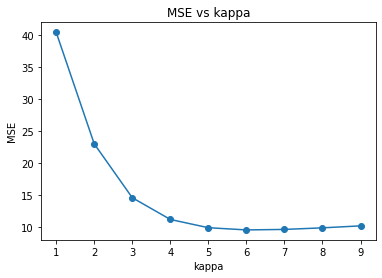

In [18]:
def prop_reg(X_test,X_train,y_train,y_test,kappa):
    d = np.zeros((len(X_test),len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            d[i,j] = np.linalg.norm(X_test[i]-X_train[j])
    c=np.zeros(len(y_test))
    for i in range(len(y_test)):
        l=0
        v=0
        for j in range(len(y_train)):
            
            l+=y_train[j]/((1+d[i,j])**kappa)
            v+=1/((1+d[i,j])**kappa)
        
        c[i]=l/v
    return(c)
kf = KFold(n_splits=10)
kappa_values = np.array([1,2,3,4,5,6,7,8,9])
mse_values = []

for kappa in kappa_values:
    mse = 0.0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        y_pred = prop_reg(X_test, X_train, y_train, y_test, kappa)
        mse += mean_squared_error(y_test, y_pred)
    mse /= kf.get_n_splits(X)
    mse_values.append(mse)
    print(f"kappa = {kappa:.3f}, avg MSE = {mse:.3f}")

# plot the MSE vs kappa curve
plt.plot(kappa_values, mse_values, '-o')
plt.xlabel('kappa')
plt.ylabel('MSE')
plt.title('MSE vs kappa')
plt.show()

In [19]:
# find the index of the minimum MSE value
min_index = np.argmin(mse_values)

# print the minimum MSE value and the corresponding kappa value
print(f"Minimum MSE: {mse_values[min_index]:.3f}, Kappa value: {kappa_values[min_index]}")

Minimum MSE: 9.524, Kappa value: 6
